In [1]:
from pandas import   read_csv, Grouper, DataFrame, concat
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
### Read the time series data

series = read_csv('C:/Users/lenovo/Desktop/Jabeena/Updated_Dataset.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)

In [3]:
print(series.head())

        Datetime       BESCOM
0  1/1/2018 0:00  211786.8638
1  1/1/2018 1:00  204022.4531
2  1/1/2018 2:00  198376.1782
3  1/1/2018 3:00  198870.6240
4  1/1/2018 4:00  201310.4045


In [4]:
series['Datetime']=pd.to_datetime(series['Datetime'])
series=series.set_index('Datetime')
series_daily=series.resample('D').sum()

In [5]:
series

,BESCOM
Datetime,
2018-01-01 00:00:00,211786.8638
2018-01-01 01:00:00,204022.4531
2018-01-01 02:00:00,198376.1782
2018-01-01 03:00:00,198870.6240
2018-01-01 04:00:00,201310.4045
...,...
2019-12-31 19:00:00,248972.7234
2019-12-31 20:00:00,232655.9861
2019-12-31 21:00:00,226721.6016


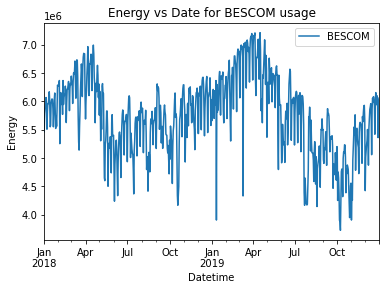

In [6]:
series_daily.plot()
plt.ylabel('Energy')
plt.title('Energy vs Date for BESCOM usage')
plt.show()

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
import statsmodels.api as sm

<ipython-input-8-66273482871b>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompTurnover = sm.tsa.seasonal_decompose(series_daily.BESCOM, model="mul", freq=12)


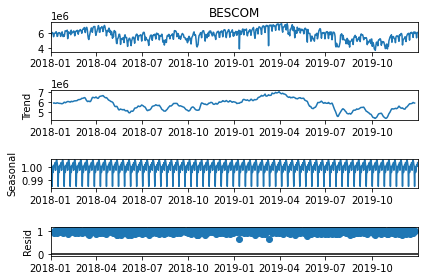

In [8]:
decompTurnover = sm.tsa.seasonal_decompose(series_daily.BESCOM, model="mul", freq=12)
decompTurnover.plot()
plt.show()

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [11]:
# Split into train and test set
train_data = series_daily[:550] 
test_data = series_daily[550:] 

In [12]:
fitted_model = ExponentialSmoothing(train_data['BESCOM'],trend='mul',seasonal='mul',seasonal_periods=365).fit()

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [13]:
test_predictions = fitted_model.forecast(180).rename('BESCOM Test Forecast')

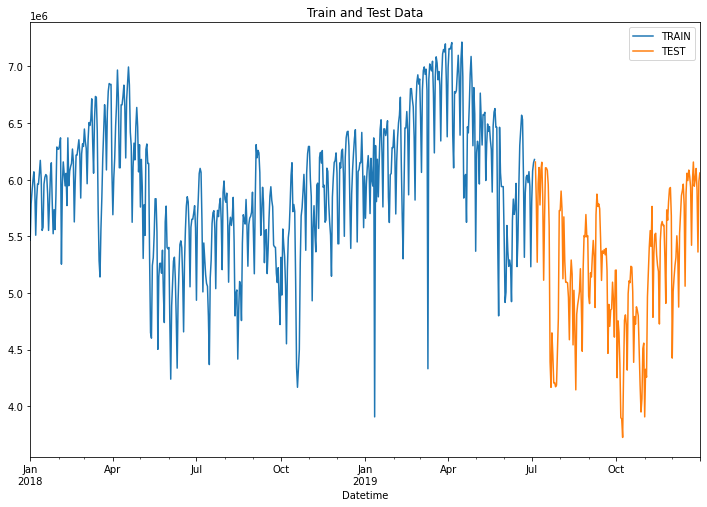

In [14]:
train_data['BESCOM'].plot(legend=True,label='TRAIN')
test_data['BESCOM'].plot(legend=True,label='TEST',figsize=(12,8))
plt.title('Train and Test Data');

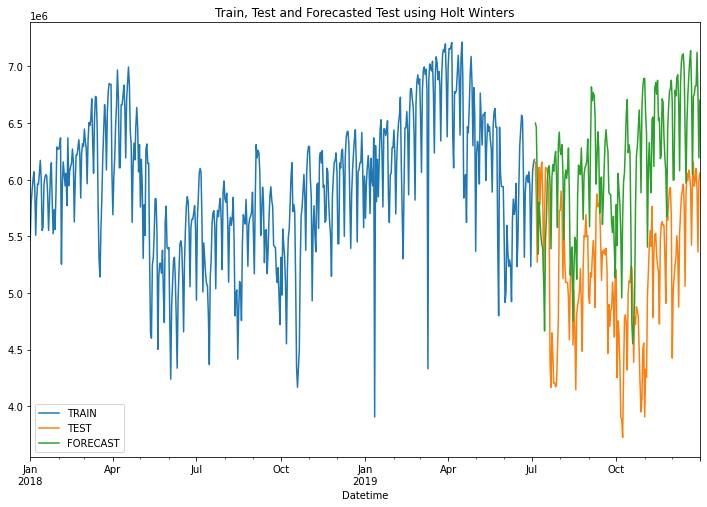

In [15]:
train_data['BESCOM'].plot(legend=True,label='TRAIN')
test_data['BESCOM'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='FORECAST')
plt.title('Train, Test and Forecasted Test using Holt Winters');

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:489: UserWarning: Attempting to set identical left == right == 18251 results in singular transformations; automatically expanding.
  ax.set_xlim(self.xlim)


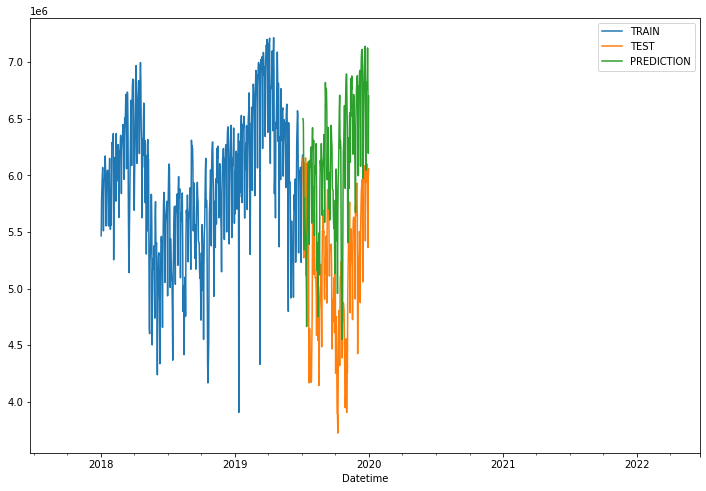

In [16]:
train_data['BESCOM'].plot(legend=True,label='TRAIN')
test_data['BESCOM'].plot(legend=True,label='TEST',figsize=(12,8), xlim=['2019-12-21','2019-12-31'])
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2019-12-21','2019-12-21']);

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [18]:
print(f'Mean Absolute Error = {mean_absolute_error(test_data,test_predictions)}')

Mean Absolute Error = 1009097.8818908926


In [19]:
print(f'Mean Squared Error = {mean_squared_error(test_data,test_predictions)}')

Mean Squared Error = 1361662408618.1147


In [20]:
def mean_absolute_percentage_error(y_test,y_pred):
    return np.mean(np.abs(((y_test-y_pred)/y_test)))*100

In [21]:
print(mean_absolute_percentage_error(test_predictions.values,test_data.values))

16.454048820769295


In [31]:
test_predictions

2019-07-05    6.499397e+06
2019-07-06    6.464355e+06
2019-07-07    6.005813e+06
2019-07-08    5.341384e+06
2019-07-09    5.803354e+06
                  ...     
2019-12-27    6.826496e+06
2019-12-28    7.124144e+06
2019-12-29    6.754549e+06
2019-12-30    6.193425e+06
2019-12-31    6.701429e+06
Freq: D, Name: BESCOM Test Forecast, Length: 180, dtype: float64

In [32]:
test_data

,BESCOM
Datetime,
2019-07-05,6.156214e+06
2019-07-06,5.811105e+06
2019-07-07,5.271376e+06
2019-07-08,5.963573e+06
2019-07-09,6.107762e+06
...,...
2019-12-27,6.099080e+06
2019-12-28,5.907196e+06
2019-12-29,5.361519e+06


In [22]:
test_predictions.head()

2019-07-05    6.499397e+06
2019-07-06    6.464355e+06
2019-07-07    6.005813e+06
2019-07-08    5.341384e+06
2019-07-09    5.803354e+06
Freq: D, Name: BESCOM Test Forecast, dtype: float64

In [23]:
test_data.head()

,BESCOM
Datetime,
2019-07-05,6.156214e+06
2019-07-06,5.811105e+06
2019-07-07,5.271376e+06
2019-07-08,5.963573e+06
2019-07-09,6.107762e+06


In [25]:
final_model = ExponentialSmoothing(series_daily['BESCOM'],trend='add',seasonal='add',seasonal_periods=365).fit()

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [26]:
forecast_predictions = final_model.forecast(steps=180)

In [27]:
forecast_predictions.head()

2020-01-01    5.550321e+06
2020-01-02    5.812481e+06
2020-01-03    5.924806e+06
2020-01-04    6.002909e+06
2020-01-05    5.962949e+06
Freq: D, dtype: float64

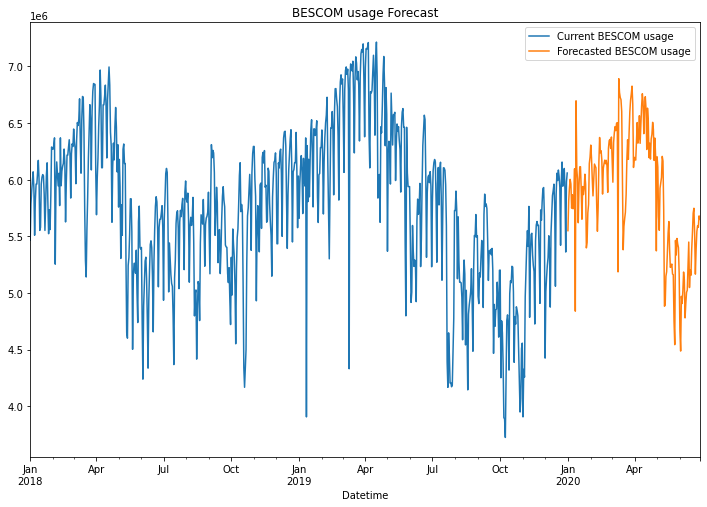

In [29]:
series_daily['BESCOM'].plot(figsize=(12,8),legend=True,label='Current BESCOM usage')
forecast_predictions.plot(legend=True,label='Forecasted BESCOM usage')
plt.title('BESCOM usage Forecast');